In [ ]:
# conda create -n sctm python=3.8
#!pip install anndata
#!pip install matplotlib
#!pip install scanpy
#!pip install sctm
#!pip install numba==0.57.1
#!pip install squidpy==1.2.3

In [ ]:
import os
import random

import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import sctm
import squidpy as sq
import torch
from matplotlib import cm

sc.settings.figdir = "/data/project/AI4Omic/MASLD/results/ST/STAMP"
sc.set_figure_params(format="pdf", facecolor="white", dpi_save=300, figsize=(5,5))


%load_ext autoreload
%autoreload 2

/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


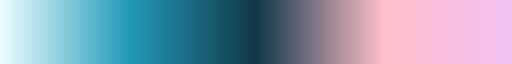

In [ ]:
#cmap = sns.blend_palette(["#eefdff", '#239bb9', '#113847', '#fcb70c', "#f98d06"], as_cmap=True)
cmap = sns.blend_palette(["#eefdff", '#239bb9', '#113847', 'Pink', '#F4C4F4'], as_cmap=True)
cmap

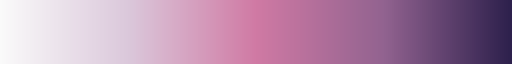

In [3]:
cmap = sns.blend_palette(["#fafafa", '#dbc8db', '#d07aa4', '#926390', '#2d204c'], as_cmap=True)
cmap

In [ ]:
# All 10x visium sections
sp_data_folder = '/data/project/AI4Omic/MASLD/data/Rawdata/Visium/'
section_ids = [file for file in os.listdir(sp_data_folder) if os.path.isdir(os.path.join(sp_data_folder, file))]
#section_ids.pop(section_ids.index('NAFL-171'))
adatas = {}
for section_id in section_ids:
    adata = sc.read_visium(path=os.path.join(sp_data_folder, section_id, 'outs'), count_file='filtered_feature_bc_matrix.h5', load_images=True)
    adata.var_names_make_unique(join='++')
    adata.obs['disease_status'] = section_id.split('-')[0]
    adata.obs['sample'] = section_id

    # Add clinical metadata
    clinical_info = pd.read_csv('/data/project/AI4Omic/MASLD/results/ST/clinical_info.csv')
    adata.obs['Age'] = clinical_info.loc[clinical_info['sample'] == adata.obs['sample'][0], 'Age'].values[0]
    adata.obs['Sex'] = clinical_info.loc[clinical_info['sample'] == adata.obs['sample'][0], 'Sex'].values[0]
    adata.obs['Steatosis'] = clinical_info.loc[clinical_info['sample'] == adata.obs['sample'][0], 'Steatosis'].values[0]
    adata.obs['Ballooning'] = clinical_info.loc[clinical_info['sample'] == adata.obs['sample'][0], 'Ballooning'].values[0]
    adata.obs['Lobular_inflammation'] = clinical_info.loc[clinical_info['sample'] == adata.obs['sample'][0], 'Lobular_inflammation'].values[0]
    adata.obs['Fibrosis'] = clinical_info.loc[clinical_info['sample'] == adata.obs['sample'][0], 'Fibrosis'].values[0]
    adata.obs['NAS'] = clinical_info.loc[clinical_info['sample'] == adata.obs['sample'][0], 'NAS'].values[0]

    # filter low-quality spots
    sc.pp.filter_cells(adata, min_counts=400)
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)

    # update spatial uns
    file = list(adata.uns['spatial'].keys())[0]
    adata.uns['spatial'][section_id] = adata.uns['spatial'][file].copy()
    if file != section_id:
        del adata.uns['spatial'][file]
    print(adata.uns['spatial'].keys())

    #make spot name unique
    adata.obs_names =  [section_id + '_' + x for x in adata.obs_names]
    adata.obs['library_id'] = section_id
       
    adatas[section_id] = adata`

/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-179'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-0422'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-180'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1481'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1086'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1492'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1494'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1495'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1498'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-3096'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1493'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-2534'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1501'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1478'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-0413'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-161'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-0966'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1475'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-9440'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1497'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1479'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-4426'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1480'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-7866'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-8715'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-0835'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-9136'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-3344'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-2768'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-5759'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-4973'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-9993'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-5113'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-8395'])


/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-8684'])


In [ ]:
adata_concat = ad.concat(adatas, uns_merge="only", join='outer', fill_value=0)
adata_concat = adata_concat[:, ~adata_concat.var_names.str.startswith(("MT-", 'RPL', 'RPS'))]
adata_concat = adata_concat[:, ~adata_concat.var_names.str.contains(("^HB[^(P)(E)]"))]
adata_concat.obs['disease_status'] = pd.Categorical(adata_concat.obs['disease_status'], categories=['CTRL', 'MASL', 'MASH'], ordered=True)
adata_concat.uns['disease_status_colors'] = ['#a6cee3', '#fdbf6f', '#b15928']
adata_concat

/tmp/ipykernel_2350933/1219875140.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_concat.obs['disease_status'] = pd.Categorical(adata_concat.obs['disease_status'], categories=['CTRL', 'MASLD', 'MASH'], ordered=True)


AnnData object with n_obs × n_vars = 48154 × 22357
    obs: 'in_tissue', 'array_row', 'array_col', 'disease_status', 'sample', 'Age', 'Sex', 'Steatosis', 'Ballooning', 'Lobular_inflammation', 'Fibrosis', 'NAS', 'n_counts', 'n_genes', 'library_id'
    uns: 'spatial', 'disease_status_colors'
    obsm: 'spatial'

In [9]:
adata = adata_concat[adata_concat.obs['disease_status'] == 'MASH'].copy()
sctm.pp.filter_genes(adata, min_cutoff=0.01, max_cutoff=0.95)
adata.layers["counts"] = adata.X.copy()
sctm.pp.batch_highly_variable_genes(adata, n_top_genes=4000, layer="counts", subset=False, batch_key="library_id")
adata.obs["library_id"] = adata.obs["library_id"].astype("category")
sq.gr.spatial_neighbors(adata, library_key="library_id", n_rings=1) # sq.gr.spatial_neighbors(adata, n_rings=2, coord_type="grid", n_neighs=6)

/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:151: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": "seurat_v3"}
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:151: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": "seurat_v3"}
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:151: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": "seurat_v3"}
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:151: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
 

In [10]:
n_topics = 20
model = sctm.stamp.STAMP(
    adata[:, adata.var.highly_variable],
    n_topics,
    layer="counts",
    categorical_covariate_keys=["library_id"],
    mode="sign", # mode (str, optional): sign vs sgc(simplified graph convolutions).
    dropout = 0.1,
    n_layers=1,
    gene_likelihood="nb"
)

model.train(device = "cuda:0", early_stop=True, learning_rate=0.01)

Computing background frequencies


  0%|          | 0/800 [00:00<?, ?it/s]/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/pyro/primitives.py:478: UserWarning: encoder.norm_topic.0.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/pyro/primitives.py:478: UserWarning: encoder.norm_topic.1.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/pyro/primitives.py:478: UserWarning: encoder.norm_topic.2.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/pyro/primitives.py:478: UserWarning: encoder.norm_topic.3.weight was not regi

Early Stopping


In [ ]:
topic_prop = model.get_cell_by_topic()
beta = model.get_feature_by_topic()
adata.obsm['X_stamp'] = topic_prop.values
for i in topic_prop.columns:
    adata.obs[i] = topic_prop[i]

adata.obsm["X_pca"] = topic_prop.to_numpy()
sc.pp.neighbors(adata, metric = "cosine")
sc.tl.umap(adata)
sc.pl.umap(adata, color=['library_id', 'Fibrosis'], frameon=False, palette='tab10')

In [ ]:
adata.uns['beta'] = beta
adata.uns['topic_prop'] = topic_prop

In [ ]:
# re-load the STAMP results
#adata = sc.read_h5ad("/data/project/AI4Omic/MASLD/results/ST/STAMP/adata_stamp.h5ad")
beta = adata.uns['beta'].copy()
topic_prop = adata.uns['topic_prop'].copy()

In [16]:
# Find topic signature genes
topic_sig = {}
for topic in topic_prop.columns:
    topic_sig[topic] = beta.nlargest(100, topic).index.tolist()

In [ ]:
# Save the topic signature genes to a CSV file
topic_sig_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in topic_sig.items()]))
topic_sig_df.to_csv('/data/project/AI4Omic/MASLD/results/ST/STAMP/topic_signature_genes.csv', index=False)

In [ ]:
for key in topic_sig.keys():
    print(topic_sig[key])

['SDS', 'CRP', 'NNMT', 'HAL', 'TMEM45B', 'SAA2', 'FAM83A-AS1', 'PLA2G2A', 'SDSL', 'SAA1', 'CXCL2', 'GLS2', 'UNC93A', 'ERICH5', 'ANGPTL4', 'GJA4', 'LINC02749', 'SLPI', 'ENHO', 'LINC01702', 'WFDC2', 'CLDN5', 'LINC02762', 'CYP2A7', 'PLXNA4', 'TBX15', 'FAM151A', 'HMGB3', 'CYFIP2', 'AMDHD1', 'AC092969.1', 'CRIP2', 'CPE', 'DBH', 'SYT7', 'SCGB3A1', 'LBP', 'AL360013.3', 'FES', 'TMEM54', 'CLPTM1L', 'OXT', 'COX7A1', 'KCNK17', 'AL359555.4', 'LRG1', 'PZP', 'PRSS8', 'AC099509.1', 'DDIT3', 'LINC02716', 'DNAJC12', 'APOA4', 'AC008760.2', 'HAPLN4', 'HIST1H2BD', 'ASPG', 'EGFL7', 'ID1', 'APOF', 'SLC23A2', 'SMIM24', 'IGFLR1', 'COL5A3', 'CDHR2', 'TGM2', 'LINC01767', 'SLITRK3', 'DLL4', 'LRRC32', 'FGFR2', 'AC112206.2', 'AC104809.1', 'ACMSD', 'MYO1E', 'AL138826.1', 'ANGPTL6', 'ETNPPL', 'C12orf10', 'KRT19', 'PTH1R', 'NDUFA6', 'SUSD3', 'FLOT1', 'ADGRA3', 'IP6K3', 'GOLM1', 'LINC01554', 'UROC1', 'FNDC5', 'EGR1', 'LINC01370', 'LAPTM4B', 'SMIM1', 'MT1M', 'FST', 'NDUFA4L2', 'CCDC85B', 'LAMA4', 'C9']
False
['CXCL10',

In [ ]:
# Mutl-cellular programs
for i in topic_prop.columns:
    sc.tl.score_genes(adata_sc, beta.nlargest(30, i).index, score_name = i + "_score")
#sc.pl.umap(adata_sc, color = [i + '_score' for i in topic_prop.columns], cmap = 'RdPu')
#sc.pl.dotplot(adata_sc, var_names=[i + '_score' for i in topic_prop.columns], cmap = 'Blues', groupby='cell_type_lvl2', dendrogram=True)

In [23]:
for i in topic_prop.columns:
    sc.tl.score_genes(adata_concat, beta.nlargest(100, i).index, score_name = i + "_score", ctrl_size = 100)
    adata_concat.obs[i] = topic_prop[i]
scores = [topic + "_score" for topic in topic_prop.columns]

... storing 'sample' as categorical


... storing 'library_id' as categorical
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


Dotplot axes: {'mainplot_ax': <Axes: >, 'size_legend_ax': <Axes: title={'center': 'Fraction of cells\nin group (%)'}>, 'color_legend_ax': <Axes: title={'center': 'Mean expression\nin group'}>}


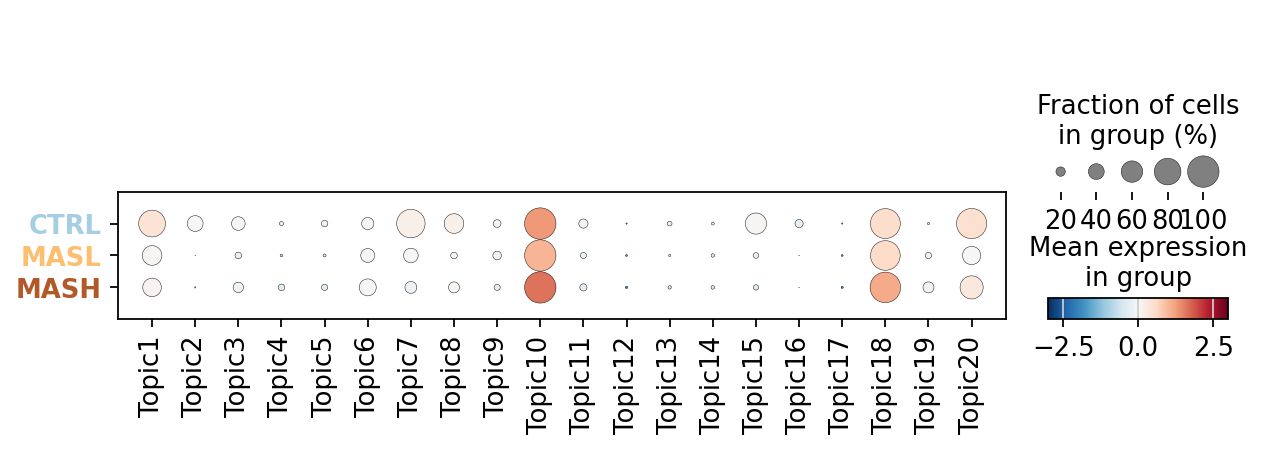

In [ ]:
dp = sc.pl.dotplot(adata_concat, var_names=scores, cmap = 'RdBu_r', groupby='disease_status', show=False, vmin=-3, vmax=3)
# All Axes used in dotplot
print("Dotplot axes:", dp)
# Select the Axes object that contains the subplot of interest
ax = dp["mainplot_ax"]
# Loop through ticklabels and make them italic
for l in ax.get_yticklabels():
    l.set_weight("bold")
    g = l.get_text()
    # Change settings (e.g. color) of certain ticklabels based on their text (here gene name)
    if g == "CTRL":
        l.set_color('#a6cee3')
    elif g == "MASL":
        l.set_color('#fdbf6f')
    elif g == "MASH":
        l.set_color('#b15928')
ax.set_xticklabels([label.get_text().replace("_score", "") for label in ax.get_xticklabels()])
plt.savefig("/data/project/AI4Omic/MASLD/results/ST/STAMP/STAMP_dotplot_by_disease_status.pdf", dpi=300, bbox_inches='tight')

In [10]:
df = pd.DataFrame(columns=['sample', 'disease_status', 'topic'])
for topic in topic_prop.columns:
    vp99 = np.quantile(adata_concat.obs[f'{topic}_score'], 0.99)
    df_temp = adata_concat.obs.loc[adata_concat.obs[f'{topic}_score'] > vp99, ['sample', 'disease_status']]
    df_temp['topic'] = topic
    df = pd.concat((df, df_temp)) 
#df = df[~(df['sample'].isin(['CTRL-5759', 'CTRL-179']))]
df_pivot = df.groupby(['topic', 'sample']).size().reset_index(name='count').pivot_table(index='topic', columns='sample', values='count', aggfunc='sum', fill_value=0)
df_pivot = df_pivot.div(adata_concat.obs['sample'].value_counts()[df_pivot.columns], axis=1)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot = df_pivot.loc[topic_prop.columns, :]

In [ ]:
df_pivot.loc['Topic5',:].sort_values(ascending=False)

In [ ]:
# Stacked bar plot to show the percentage of cells with topic score > 99th percentile by sample / disease status
df = pd.DataFrame(columns=['sample', 'disease_status', 'topic'])
for topic in topic_prop.columns:
    vp99 = np.quantile(adata_concat.obs[f'{topic}_score'], 0.99)
    df_temp = adata_concat.obs.loc[adata_concat.obs[f'{topic}_score'] > vp99, ['sample', 'disease_status']]
    df_temp['topic'] = topic
    df = pd.concat((df, df_temp)) 
df_pivot = df.groupby(['topic', 'sample']).size().reset_index(name='count').pivot_table(index='topic', columns='sample', values='count', aggfunc='sum', fill_value=0)
df_pivot = df_pivot.div(adata_concat.obs['sample'].value_counts()[df_pivot.columns], axis=1)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot = df_pivot.loc[topic_prop.columns, :]
# Reorder the columns to display CTRL, MASL, and then MASH samples
ordered_columns = [col for col in df_pivot.columns if col.startswith('CTRL')] + \
                  [col for col in df_pivot.columns if col.startswith('MASL')] + \
                  [col for col in df_pivot.columns if col.startswith('MASH')]
df_pivot = df_pivot[ordered_columns]
df_pivot.plot(kind='barh', stacked=True, color=[adata_concat.uns['disease_status_colors'][adata_concat.obs['disease_status'].cat.categories.get_loc(status.split('-')[0])] for status in df_pivot.columns], edgecolor='white', width=0.8, linewidth=0.25)
plt.xlabel('Percentage')
plt.ylabel('Spatial Topics')
plt.axis(xmax=1.01)
plt.title('Percentage of spots with topic score > 99th percentile by sample')
plt.legend(title='Disease Status', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.grid(False)
plt.savefig("/data/project/AI4Omic/MASLD/results/ST/STAMP/STAMP_topic_score_99th_percentile_by_sample.pdf", dpi=300, bbox_inches='tight')

In [30]:
beta.Topic4.sort_values(ascending=False).head(100).index

Index(['FABP4', 'SPP1', 'TREM2', 'FABP5', 'LPL', 'LGALS3', 'CD52', 'PLA2G7',
       'CAPG', 'CCL4L2', 'MMP9', 'LSP1', 'CXCL9', 'DHRS9', 'RGCC', 'GPNMB',
       'C15orf48', 'EMILIN2', 'LYZ', 'ITGAX', 'CXCL10', 'CD83', 'OTOA',
       'LGALS2', 'RGS10', 'LTB', 'HLA-DQA1', 'AC020656.1', 'CD48', 'HCST',
       'CCL18', 'CCL4', 'NCF2', 'S100A11', 'RAB7B', 'MSR1', 'BCL2A1', 'CXCR4',
       'SLAMF7', 'SLAMF8', 'TYROBP', 'EVI2A', 'CCL3', 'CD84', 'HAVCR2', 'UCP2',
       'HLA-DPA1', 'RAC2', 'S100A8', 'IGSF6', 'ITGB2', 'BCAT1', 'C5AR1',
       'LAIR1', 'TRAC', 'FCGR2A', 'CCL3L1', 'FPR3', 'GLIPR1', 'MMP19',
       'SLC1A3', 'CCL5', 'CD53', 'CD44', 'VIM', 'HLA-DMB', 'CD3D', 'CD2',
       'FCN1', 'BIRC3', 'IFI30', 'SPI1', 'GLIPR2', 'LILRB4', 'HLA-DRA',
       'TRBC2', 'LAPTM5', 'HS3ST2', 'LGALS9', 'IL2RG', 'HLA-DRB1', 'PLEK',
       'HLA-DQB1', 'UBD', 'GZMA', 'WDFY4', 'CORO1A', 'S100A9', 'FGR',
       'HLA-DPB1', 'S100A6', 'S100A4', 'PLXNC1', 'CRIP1', 'KLRB1', 'ALOX5AP',
       'PILRA', 'SASH3', 'FC

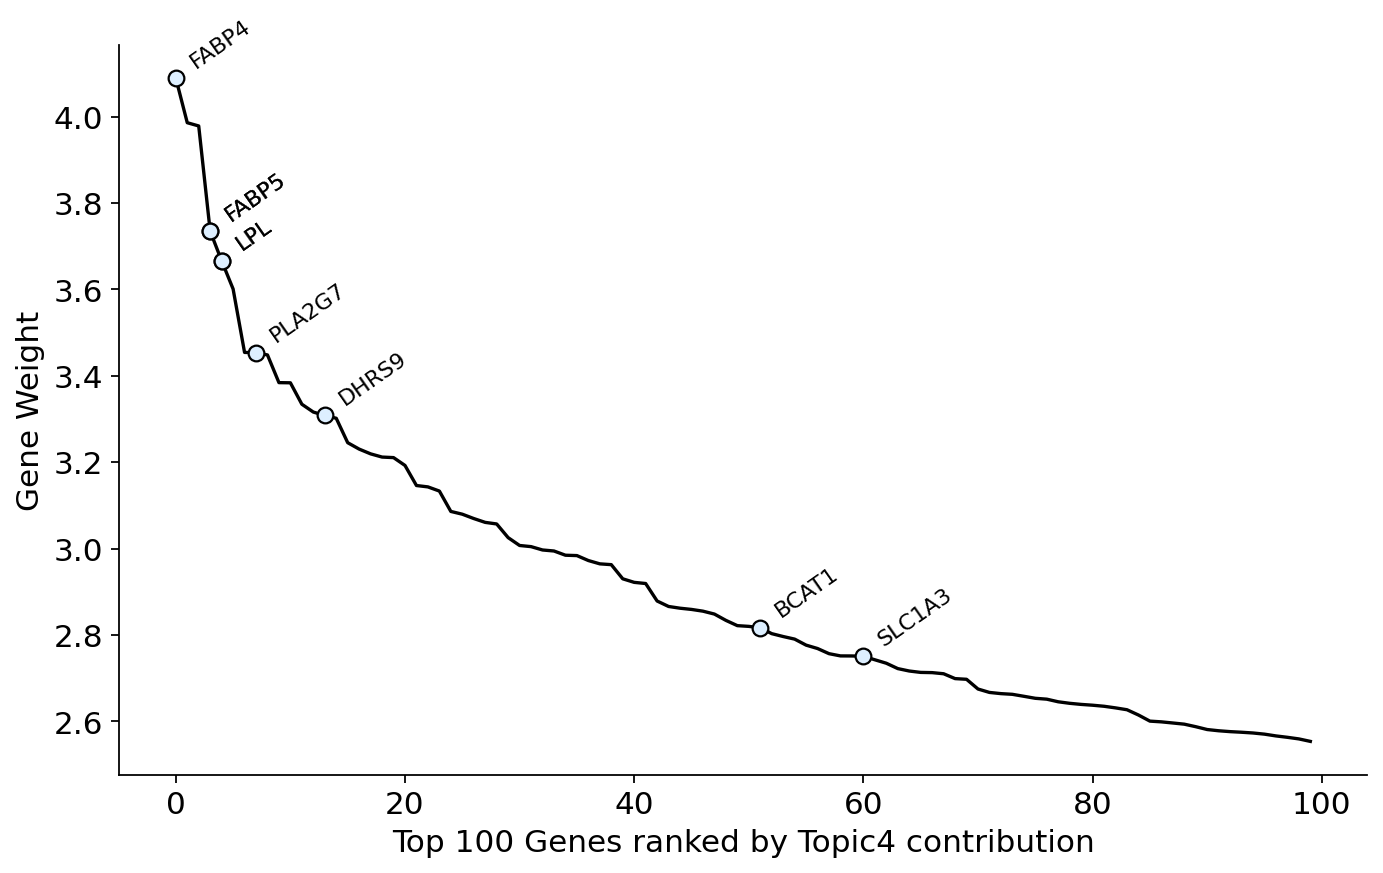

In [ ]:
genes_of_interest = ['FABP4', 'FABP5', 'LPL', 'FABP5', 'LPL', 'DHRS9', 'PLA2G7', 'BCAT1' , 'SLC1A3']
sorted_genes = beta.Topic4.sort_values(ascending=False).head(100)
plt.figure(figsize=(10, 6))
plt.plot(sorted_genes.values, marker='', color='black')

for gene in genes_of_interest:
    if gene in sorted_genes.index:
        idx = sorted_genes.index.get_loc(gene)
        plt.scatter(idx, sorted_genes[gene], color='#DDEFFF', s=50, zorder=5, edgecolor='black')
        plt.annotate(gene, (idx, sorted_genes[gene]), textcoords="offset points", fontsize=10, color='black', xytext=(5,5), rotation=35)
plt.xlabel('Top 100 Genes ranked by Topic4 contribution')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Gene Weight')
plt.title('')
plt.grid(False)
plt.savefig("/data/project/AI4Omic/MASLD/results/ST/STAMP/Topic4_genes_of_interest.pdf", dpi=300, bbox_inches='tight')

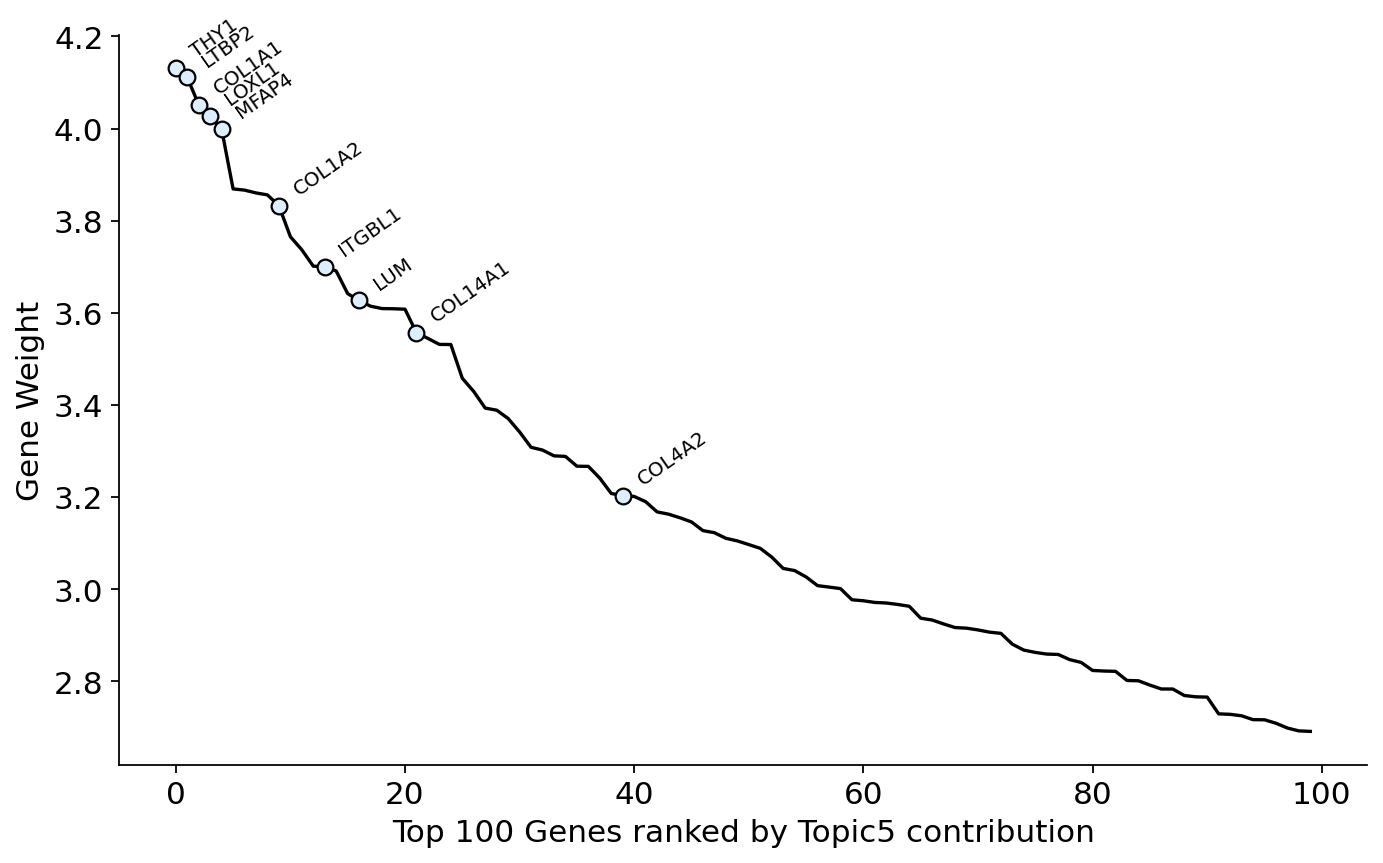

In [ ]:
genes_of_interest = ['COL1A1', 'COL1A2', 'LOXL1', 'THY1', 'LTBP2', 'ITGBL1', 'LUM', 'COL14A1', 'COL4A2', 'MFAP4']
sorted_genes = beta.Topic5.sort_values(ascending=False).head(100)
plt.figure(figsize=(10, 6))
plt.plot(sorted_genes.values, marker='', color='black')

for gene in genes_of_interest:
    if gene in sorted_genes.index:
        idx = sorted_genes.index.get_loc(gene)
        plt.scatter(idx, sorted_genes[gene], color='#DDEFFF', s=50, zorder=5, edgecolor='black')
        plt.annotate(gene, (idx, sorted_genes[gene]), textcoords="offset points", fontsize=9, color='black', xytext=(5,5), rotation=35)
plt.xlabel('Top 100 Genes ranked by Topic5 contribution')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Gene Weight')
plt.title('')
plt.grid(False)
plt.savefig("/data/project/AI4Omic/MASLD/results/ST/STAMP/Topic5_genes_of_interest.pdf", dpi=300, bbox_inches='tight')

In [ ]:
sctm.analysis.get_topic_enrichr(beta, geneset='KEGG_2019_Human', topics='all', topn_genes=20)

In [ ]:
# Visualize topic signature genes in scRNA-seq data
sc.pl.umap(adata_sc, color=np.intersect1d(topic_sig['Topic19'], adata_sc.var_names), ncols=5, cmap='RdPu', vmin=0, vmax='p99.9')

In [ ]:
import decoupler as dc
# Infer enrichment with ora using significant deg
msigdb = dc.get_resource('MSigDB')
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='go_biological_process'] #go_biological_process kegg_pathways

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('GOBP_')[1] for name in msigdb['geneset']] #GOBP_ KEGG_

In [ ]:
enr_pvals[enr_pvals['FDR p-value'] < 0.05].sort_values('Combined score', ascending=False).head(15)

In [ ]:
# Visualization of enriched terms
top_genes = topic_sig['Topic19'][0:100]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

#enr_pvals[enr_pvals['FDR p-value'] < 0.05].sort_values('Combined score', ascending=False).head(15)

dc.plot_dotplot(
    enr_pvals[enr_pvals['FDR p-value'] < 0.05].sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.02,
    figsize=(3, 6),
    cmap='RdPu',
    title='GOBP enriched in Topic6',
    #save='/data/project/AI4Omic/MASLD/results/ST/STAMP/TopicFibrosis_GOBP.pdf',
    dpi=300
)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.xlabel('Combined score', fontsize=7)
plt.grid(False)
#plt.savefig('/data/project/AI4Omic/MASLD/results/ST/STAMP/TopicFibrosis_GOBP.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/data/project/AI4Omic/MASLD/results/ST/STAMP/TopicLAMs_GOBP.pdf', dpi=300, bbox_inches='tight')

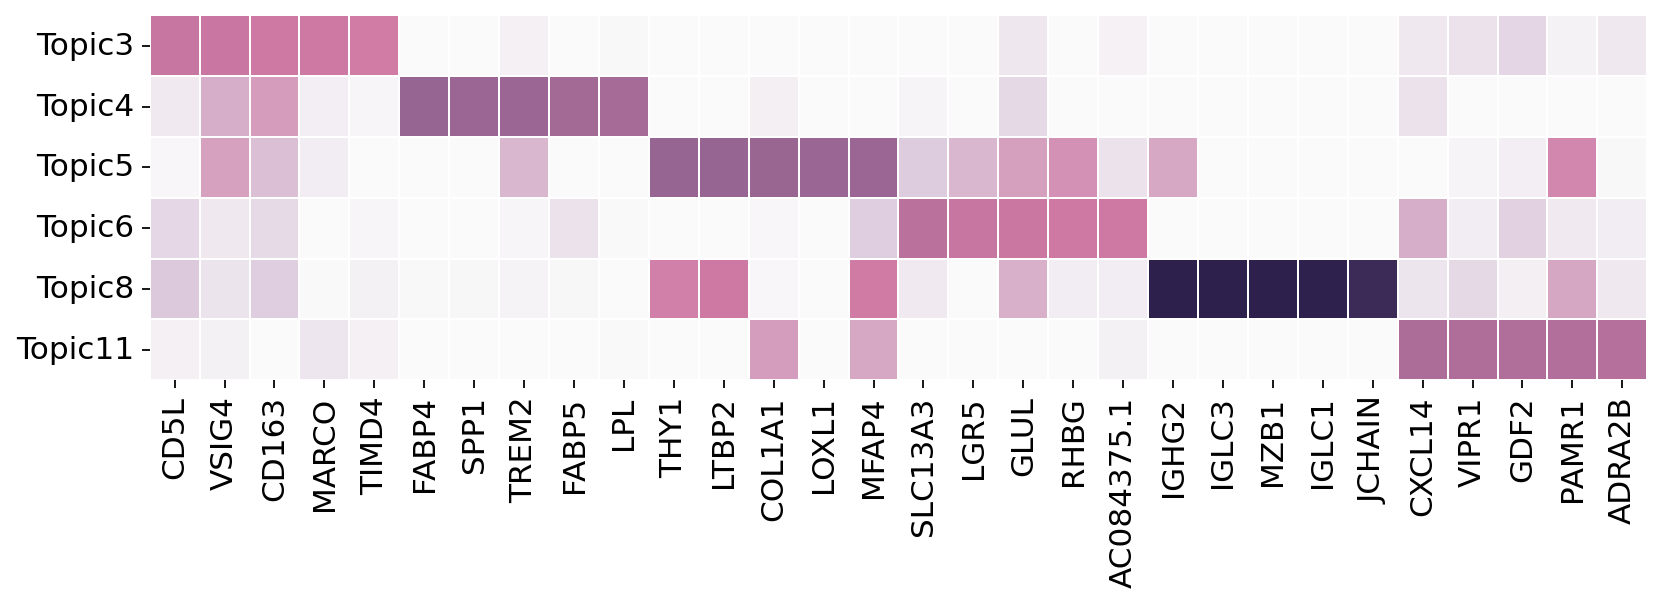

In [ ]:
# Select top 5 genes for each topic
#beta_filtered = beta.drop(columns=['Topic3', 'Topic10', 'Topic14', 'Topic12', 'Topic15', 'Topic16', 'Topic17', 'Topic19'])
beta_filtered = beta.loc[:, ['Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic8', 'Topic11']]
top_genes_per_topic = beta_filtered.apply(lambda x: x.nlargest(5).index, axis=0)

# Create a DataFrame for the heatmap
heatmap_data = beta_filtered.loc[top_genes_per_topic.values.flatten(order='F')].copy()
heatmap_data.index = pd.MultiIndex.from_tuples([(gene, topic) for topic in top_genes_per_topic.columns for gene in top_genes_per_topic[topic]])

# Plot the heatmap
plt.figure(figsize=(12, 3))
sns.heatmap(heatmap_data.T, annot=False, cmap=cmap, xticklabels=[label.split('-')[0] for label in heatmap_data.index.get_level_values(0)], vmin=-1, vmax=6, linewidths=0.01, cbar=False)
plt.grid(False)
plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.savefig('/data/project/AI4Omic/MASLD/results/ST/STAMP/Top5_genes_per_topic.pdf', dpi=300, bbox_inches='tight')

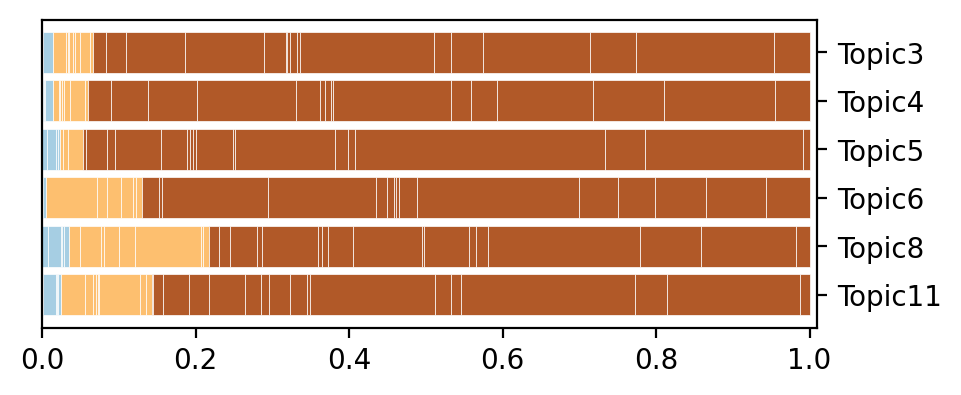

In [ ]:
# Stacked bar plot to show the percentage of cells with topic score > 99th percentile by sample / disease status
plt.rcParams['figure.figsize'] = (5,2)
df = pd.DataFrame(columns=['sample', 'disease_status', 'topic'])
for topic in topic_prop.columns:
    vp99 = np.quantile(adata_concat.obs[f'{topic}_score'], 0.99)
    df_temp = adata_concat.obs.loc[adata_concat.obs[f'{topic}_score'] > vp99, ['sample', 'disease_status']]
    df_temp['topic'] = topic
    df = pd.concat((df, df_temp)) 
df_pivot = df.groupby(['topic', 'sample']).size().reset_index(name='count').pivot_table(index='topic', columns='sample', values='count', aggfunc='sum', fill_value=0)
df_pivot = df_pivot.div(adata_concat.obs['sample'].value_counts()[df_pivot.columns], axis=1)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot = df_pivot.loc[['Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic8', 'Topic11'], :]
# Reorder the columns to display CTRL, MASLD, and then MASH samples
ordered_columns = [col for col in df_pivot.columns if col.startswith('CTRL')] + \
                  [col for col in df_pivot.columns if col.startswith('MASL')] + \
                  [col for col in df_pivot.columns if col.startswith('MASH')]
df_pivot = df_pivot[ordered_columns]
df_pivot.plot(kind='barh', stacked=True, color=[adata_concat.uns['disease_status_colors'][adata_concat.obs['disease_status'].cat.categories.get_loc(status.split('-')[0])] for status in df_pivot.columns], edgecolor='white', linewidth=0.25, width=0.85 )

plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=20)
plt.gca().invert_yaxis()
plt.axis(xmax=1.01)
plt.title('')
legend = plt.legend()
legend.set_visible(False)
plt.grid(False)
ax = plt.gca()
ax.yaxis.set_ticks_position('right')
plt.savefig("/data/project/AI4Omic/MASLD/results/ST/STAMP/STAMP_topic(MASLD-specific)_score_99th_percentile_by_sample.pdf", dpi=300, bbox_inches='tight')
import matplotlib
matplotlib.rcdefaults()

In [ ]:
# Select top 5 genes for each topic
beta_filtered = beta
top_genes_per_topic = beta_filtered.apply(lambda x: x.nlargest(5).index, axis=0)

# Create a DataFrame for the heatmap
heatmap_data = beta_filtered.loc[top_genes_per_topic.values.flatten(order='F')].copy()
# Calculate Pearson correlation for the top 5 genes per topic
correlation_matrix = beta_filtered.corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Pearson Correlation Heatmap of Topic Scores')
plt.xlabel('Topics')
plt.ylabel('Topics')
plt.grid(False)
plt.show()

In [ ]:
# Calculate distance by jaccard index
topic_sig = pd.DataFrame(topic_sig)
jaccard_metric = np.zeros((n_topics, n_topics))
for i in range(n_topics):
    for j in range(n_topics):
        jaccard_metric[i, j] = len(set(topic_sig[f'Topic{i+1}']) & set(topic_sig[f'Topic{j+1}'])) / len(set(topic_sig[f'Topic{i+1}']) | set(topic_sig[f'Topic{j+1}']))

for list in jaccard_metric:
    print(np.array(list)[np.argsort(list)][-2])

In [ ]:
for i in topic_prop.columns:
    sc.tl.score_genes(adata, beta.nlargest(50, i).index, score_name = i + "_score", ctrl_size = 50)
    adata.obs[i] = topic_prop[i]
scores = [topic + "_score" for topic in topic_prop.columns]

In [ ]:
library_id = 'MASH-0422'
sc.pl.spatial(adata[adata.obs['library_id'] == library_id], ncols=1, show=False, cmap=cmap, img_key='hires', size=1.5, frameon=False, library_id=library_id, alpha=0, crop_coord=[13000, 17000, 8000, 12000], colorbar_loc=None, save=f'{library_id}_H&E')

In [ ]:
adata_concat.X.max()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

topic_viz = 'Topic18_score'
vmax = np.percentile(adata.obs[topic_viz], 99)
vmin = np.percentile(adata.obs[topic_viz], 1)
#adata.obs['Fibrosis_group'] = 
pdf_path = '/data/project/AI4Omic/MASLD/results/ST/STAMP/Topic18_spatial_combined.pdf'
with PdfPages(pdf_path) as pdf:
    for library_id in adata_concat.obs['library_id'].unique():
        fig, ax = plt.subplots(figsize=(8, 8))
        _sc_0 = sc.pl.spatial(adata_concat[adata_concat.obs['library_id'] == library_id], color=topic_viz, vmax=vmax, ncols=1, show=False, cmap=cmap, img_key=None, vmin=vmin, size=1.5, frameon=False, ax=ax, library_id=library_id, alpha=1, add_outline=True, colorbar_loc=None)
        ax.set_title(f'{library_id} (F{adata_concat[adata_concat.obs.library_id == library_id].obs.Fibrosis[0]})', size=12)
        pdf.savefig(fig)
        plt.close(fig)

/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'sample' as categorical
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'library_id' as categorical
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/anndata/_c

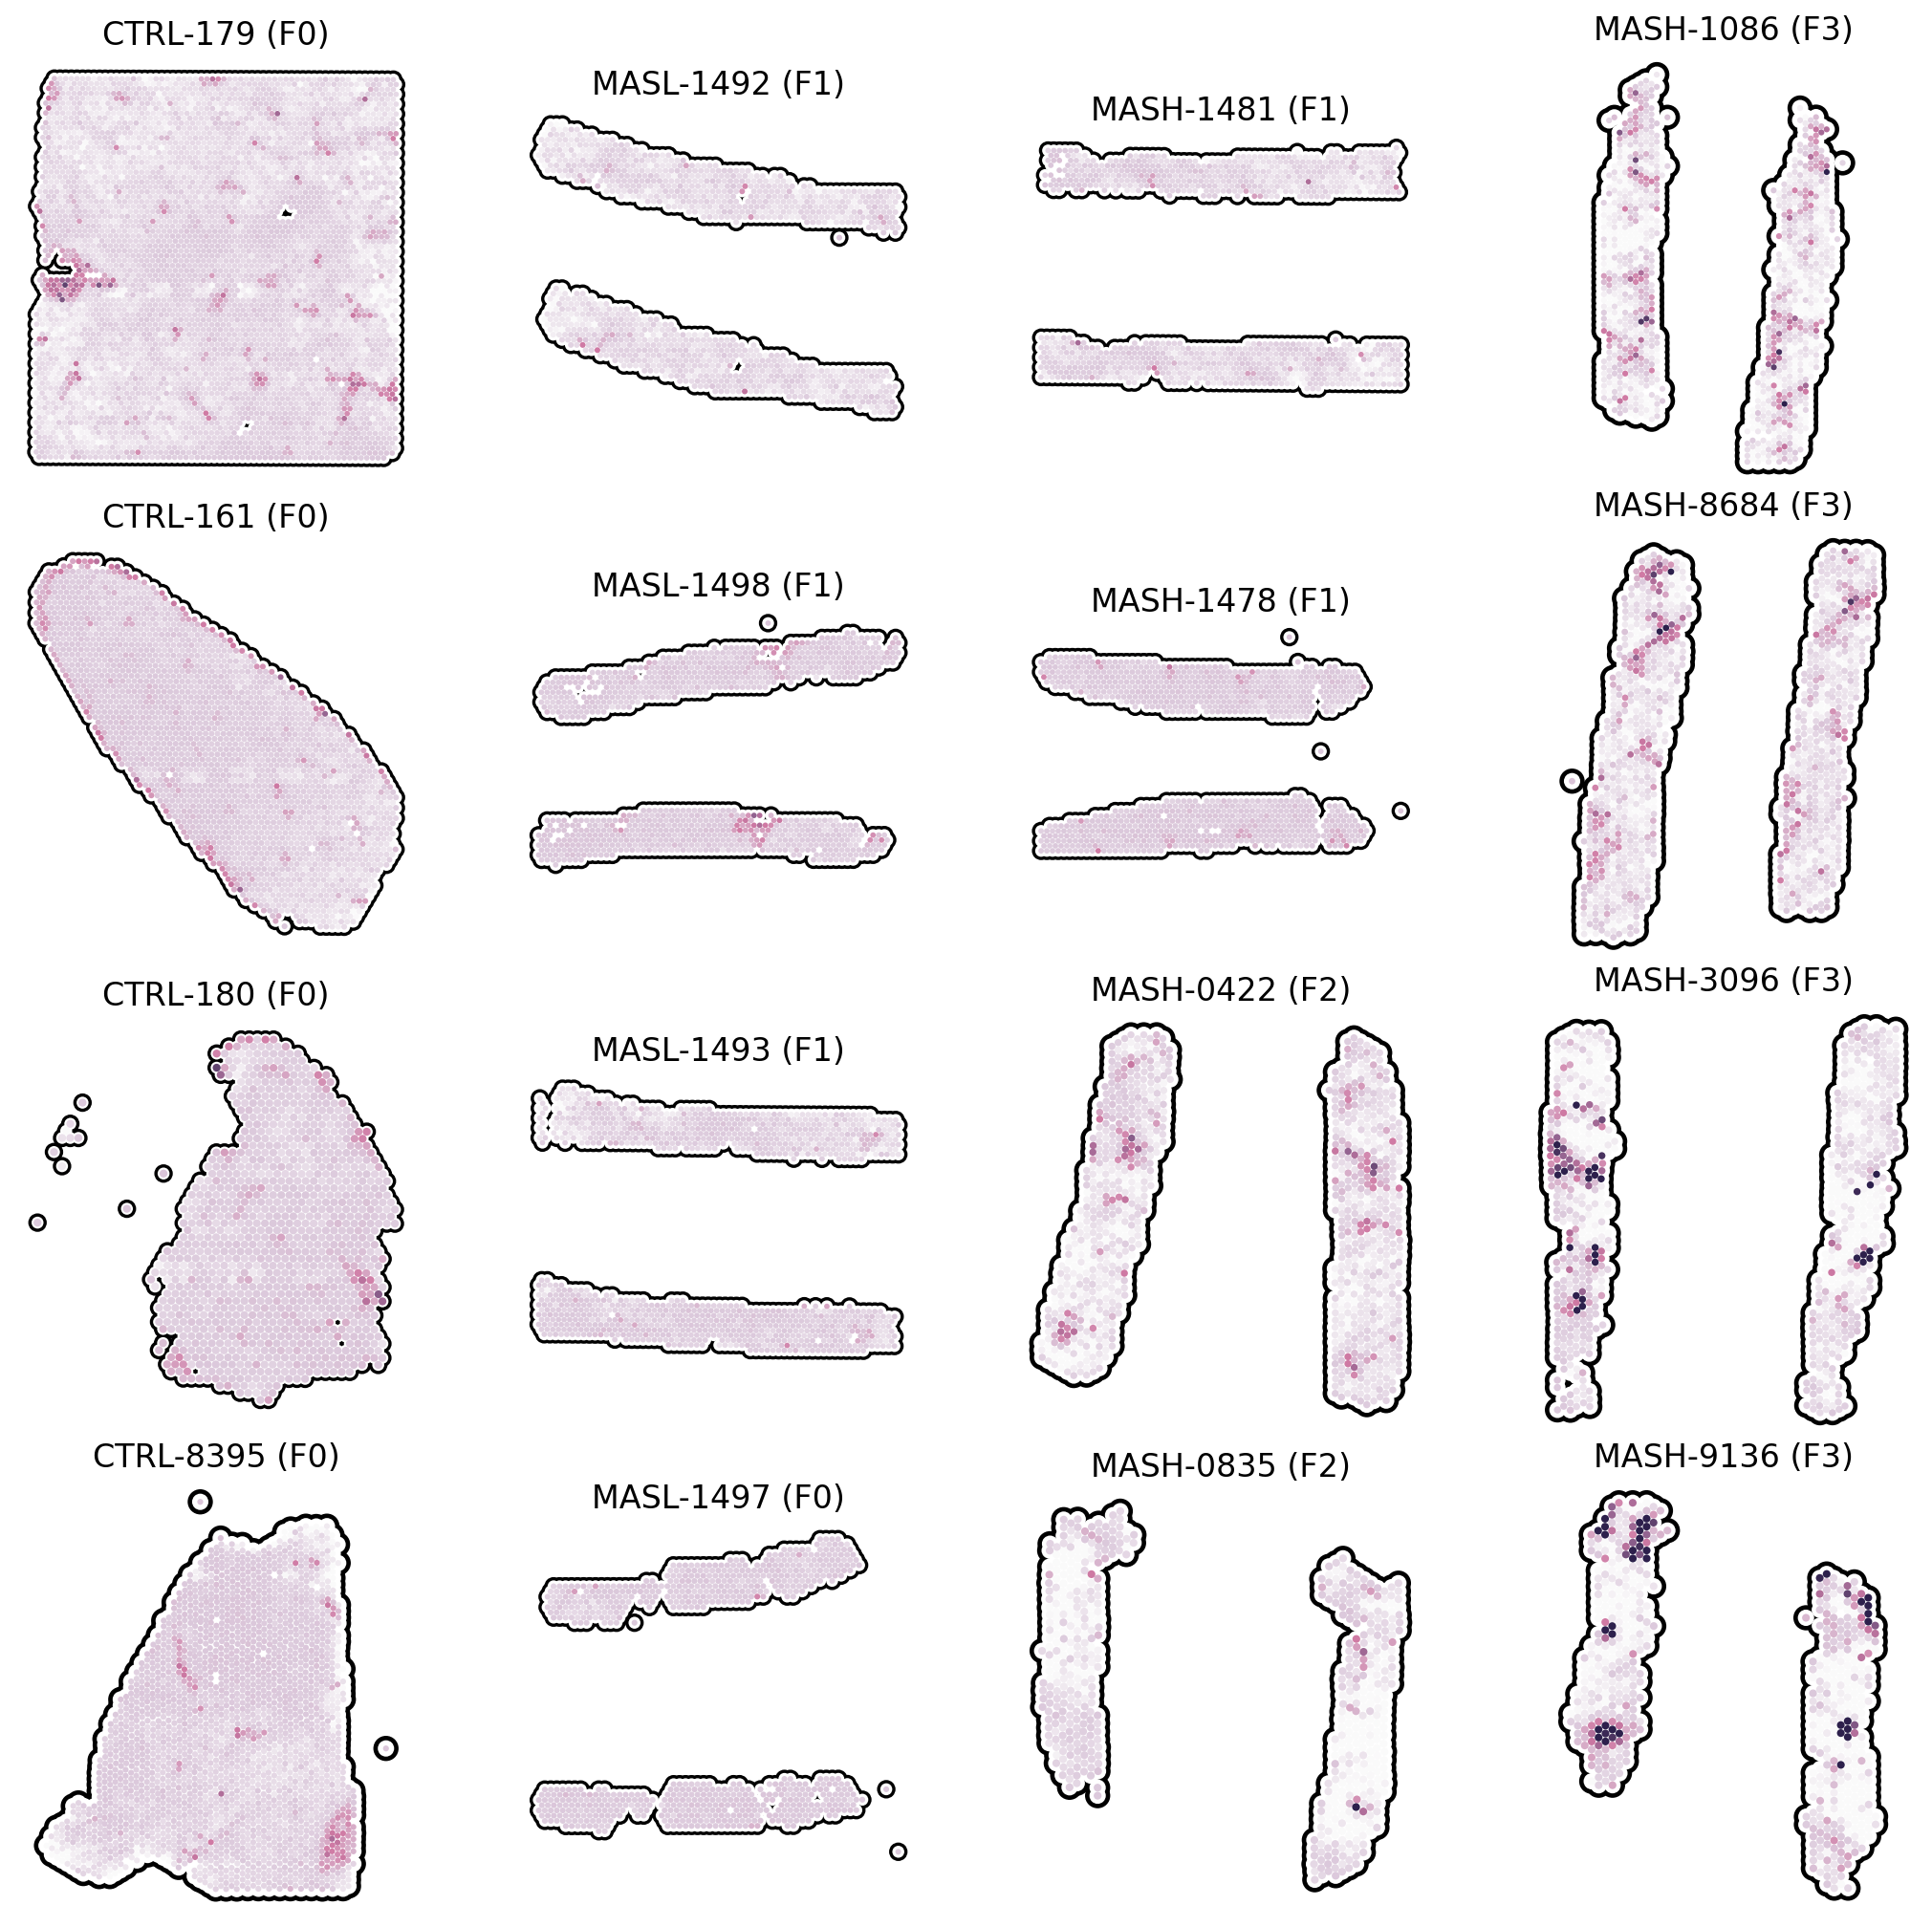

In [ ]:
topic_viz = 'Topic5_score'
vmax = np.percentile(adata.obs[topic_viz], 99)
vmin = np.percentile(adata.obs[topic_viz], 1)
#adata.obs['Fibrosis_group'] = 
fig, axs = plt.subplots(4, 4, figsize=(16, 16), gridspec_kw={'wspace':0.25, 'hspace':0.1})
#adata_concat.obs['library_id'].unique()
samples = ['CTRL-179', 'MASL-1492', 'MASH-1481', 'MASH-1086',
           'CTRL-161', 'MASL-1498', 'MASH-1478', 'MASH-8684',
           'CTRL-180', 'MASL-1493', 'MASH-0422', 'MASH-3096',
           'CTRL-8395', 'MASL-1497', 'MASH-0835', 'MASH-9136']
for library_id in samples: #adata_concat.obs['library_id'].unique()
    ss = samples.index(library_id) #adata_concat.obs['library_id'].unique().tolist().index(library_id)
    _sc_0 = sc.pl.spatial(adata_concat[(adata_concat.obs['library_id'] == library_id) & (1)], color=topic_viz, vmax=vmax, ncols=1, show=False, cmap=cmap, img_key=None, vmin=vmin, size=1.5, frameon=False, ax=axs[ss//4,ss%4], library_id=library_id, alpha=1, add_outline=True, colorbar_loc=None)
    _sc_0[0].set_title(f'{library_id} (F{adata_concat[(adata_concat.obs.library_id == library_id)].obs.Fibrosis[0]})', size=15)
plt.tight_layout()
plt.savefig('/data/project/AI4Omic/MASLD/results/ST/STAMP/TopicFibrosis_spatial.pdf', dpi=300, bbox_inches='tight')

In [ ]:
for key in adatas.keys():
    for i in topic_prop.columns:
        sc.tl.score_genes(adatas[key], beta.nlargest(50, i).index, score_name = i + "_score", ctrl_size = 100)
        adatas[key].obs[i] = topic_prop[i]
scores = [topic + "_score" for topic in topic_prop.columns]

In [ ]:
for key in adatas.keys():
    #fig1 = sc.pl.spatial(adatas[key], color = topic_prop.columns, vmax = 'p99', ncols = 10, show = True, cmap=cmap)
    #fig1 = sc.pl.spatial(adatas[key], color = [ 'IL10RA', 'IL10RB'], vmax = 'p99', ncols = 10, show = True, cmap=cmap)
    print(key)
    fig2 = sc.pl.spatial(adatas[key], color = scores, vmax = 'p99', ncols = 5, show = True, cmap=cmap, img_key=None, vmin='p1', size=1.5, frameon=False)
    #fig2 = sc.pl.spatial(adatas[key], color = 'Topic12_score', vmax = 'p99', ncols = 5, show = True, cmap=cmap, img_key=None, vmin='p1', size=2, frameon=False)
    #topics = ["Topic1", "Topic2", "Topic3", "Topic4", "Topic5", "Topic6", "Topic8"]
    #fig = sctm.pl.plot_spatial(adatas[key], topic_prop.loc[adatas[key].obs_names, topics], display_zeros=True, axis_y_flipped=False, figsize=(10,10), crop_coord=[7000, 10000, 0, 6000])

In [ ]:
topic_prop.idxmax(axis=1).value_counts()

In [ ]:
adata.obs["max_topic"] = topic_prop.idxmax(axis=1).values
adata.obs["max_topic"] = adata.obs["max_topic"].astype("category")
sc.pl.umap(adata, color="max_topic", size = 3)

In [ ]:
# Save results and reload them
#adata.write_h5ad("/data/project/AI4Omic/MASLD/results/ST/STAMP/adata_stamp.h5ad")
#adata_concat.write_h5ad("/data/project/AI4Omic/MASLD/results/ST/STAMP/adata_concat.h5ad")
adata = sc.read_h5ad("/data/project/AI4Omic/MASLD/results/ST/STAMP/adata_stamp.h5ad")
adata_concat = sc.read_h5ad("/data/project/AI4Omic/MASLD/results/ST/STAMP/adata_concat.h5ad")
beta = adata.uns['beta'].copy()
topic_prop = adata.uns['topic_prop'].copy()

Spatial correlation between PPAR and MITF

In [15]:
adata.obs['disease_status'] = adata.obs['disease_status'].cat.rename_categories({'MASLD': 'MASL'})
#adata.obs['disease_status'] = adata.obs['disease_status'].cat.reorder_categories(['CTRL', 'MASL', 'MASH'])
adata.obs['sample'] = adata.obs['sample'].str.replace('MASLD', 'MASL')
adata.obs['library_id'] = adata.obs['library_id'].str.replace('MASLD', 'MASL')
adata.obs_names = adata.obs_names.str.replace("MASLD", "MASL")
adata.uns['spatial'] = {x.replace("MASLD", "MASL"): v for x, v in adata.uns['spatial'].items()}

In [16]:
adata_concat.obs['disease_status'] = adata_concat.obs['disease_status'].cat.rename_categories({'MASLD': 'MASL'})
adata_concat.obs['disease_status'] = adata_concat.obs['disease_status'].cat.reorder_categories(['CTRL', 'MASL', 'MASH'])
adata_concat.obs['sample'] = adata_concat.obs['sample'].str.replace('MASLD', 'MASL')
adata_concat.obs['library_id'] = adata_concat.obs['library_id'].str.replace('MASLD', 'MASL')
adata_concat.obs_names = adata_concat.obs_names.str.replace("MASLD", "MASL")
adata_concat.uns['spatial'] = {x.replace("MASLD", "MASL"): v for x, v in adata_concat.uns['spatial'].items()}

In [ ]:
#PPAR Pathway scoring
PPAR_signaling = ["ACAA1", "ACADL", "ACADM", "ACOX1", "ACOX2", "ACOX3", "ACSBG1", "ACSBG2","ACSL1", "ACSL3", "ACSL4", "ACSL5", "ACSL6", "ADIPOQ", "ANGPTL4", "APOA1","APOA2", "APOA5", "APOC3", "AQP7", "CD36", "CPT1A", "CPT1B", "CPT1C","CPT2", "CYP27A1", "CYP4A11", "CYP7A1", "CYP8B1", "DBI", "EHHADH", "FABP1","FABP2", "FABP3", "FABP4", "FABP5", "FABP6", "FABP7", "FADS2", "GK2","GK3", "HMGCS2", "ILK", "LPL", "ME1", "MMP1", "NR1H3", "OLR1","PCK1", "PCK2", "PDPK1", "PLIN1", "PLTP", "PPARA", "PPARD", "PPARG","RXRA", "RXRB", "RXRG", "SCD", "SCP2", "SLC27A1", "SLC27A2", "SLC27A4","SLC27A5", "SLC27A6", "SORBS1", "UCP1"]
sc.tl.score_genes(adata_concat, gene_list=PPAR_signaling, score_name='PPAR_pathway')

#MITF Regulon scoring
adjacencies = pd.read_csv('/data/project/AI4Omic/MASLD/results/scRNA/pyscenic/adj.tsv', index_col=False, sep='\t')
MITF_targets = adjacencies.loc[adjacencies.TF == 'MITF',:].sort_values('importance', ascending=False).target[0:50]
sc.tl.score_genes(adata_concat, gene_list=MITF_targets, score_name='MITF_regulon')

[<Axes: title={'center': 'CYP3A4'}, xlabel='spatial1', ylabel='spatial2'>]

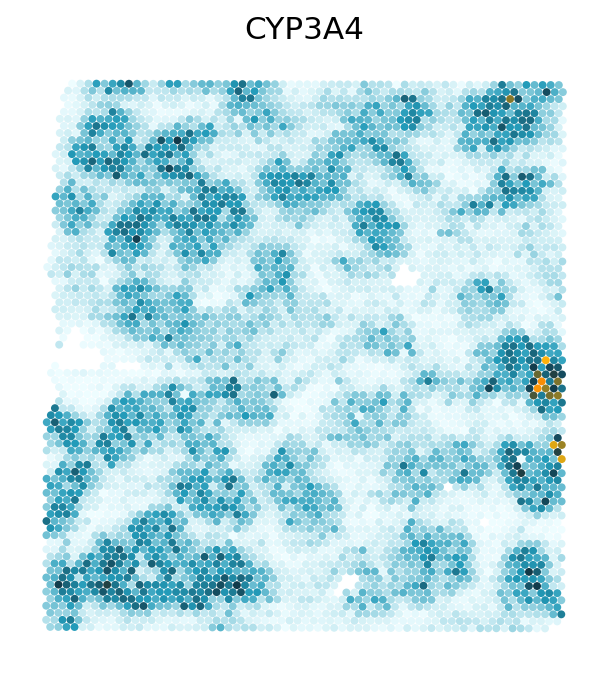

In [32]:
sc.pl.spatial(adata_concat[(adata_concat.obs['library_id'] == 'CTRL-179')], color='CYP3A4', ncols=1, show=False, cmap=sns.blend_palette(["#eefdff", '#239bb9', '#113847', '#fcb70c', "#f98d06"], as_cmap=True), img_key=None, size=1.5, frameon=False, library_id='CTRL-179', add_outline=False, colorbar_loc=None)

/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/tmp/ipykernel_3999170/4139983036.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


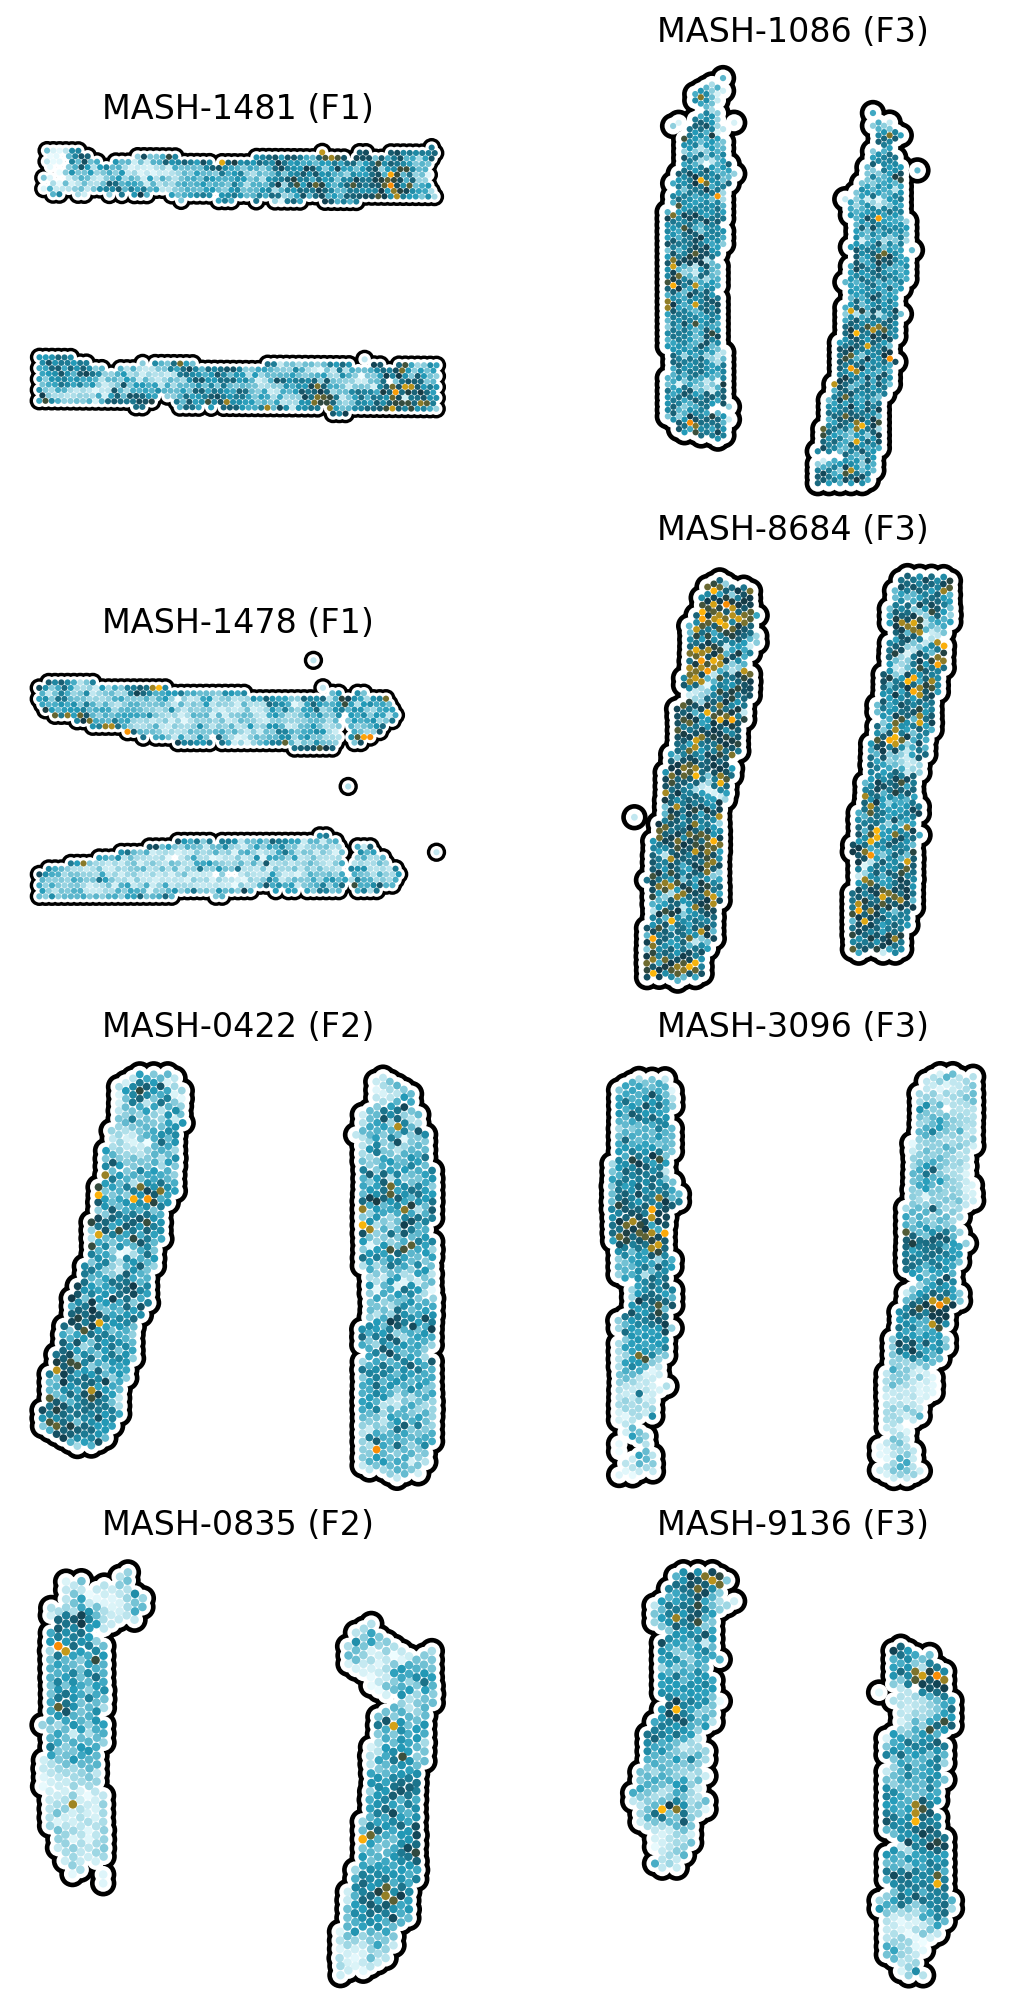

In [ ]:
# MITF visualization for 8 samples
topic_viz = 'MITF_regulon'
vmax = np.percentile(adata_concat.obs[topic_viz], 99.9)
vmin = np.percentile(adata_concat.obs[topic_viz], 5)
fig, axs = plt.subplots(4, 2, figsize=(8, 16), gridspec_kw={'wspace':0.25, 'hspace':0.1})
#adata_concat.obs['library_id'].unique()
samples = ['MASH-1481', 'MASH-1086',
           'MASH-1478', 'MASH-8684',
           'MASH-0422', 'MASH-3096',
           'MASH-0835', 'MASH-9136']
for library_id in samples: #adata_concat.obs['library_id'].unique()
    ss = samples.index(library_id) #adata_concat.obs['library_id'].unique().tolist().index(library_id)
    _sc_0 = sc.pl.spatial(adata_concat[(adata_concat.obs['library_id'] == library_id)], color=topic_viz, ncols=1, show=False, cmap=sns.blend_palette(["#eefdff", '#239bb9', '#113847', '#fcb70c', "#f98d06"], as_cmap=True), img_key=None, size=1.5, frameon=False, ax=axs[ss//2,ss%2], library_id=library_id, alpha=1, add_outline=True, colorbar_loc=None)
    _sc_0[0].set_title(f'{library_id} (F{adata_concat[(adata_concat.obs.library_id == library_id)].obs.Fibrosis[0]})', size=15)
plt.tight_layout()
plt.savefig('/data/project/AI4Omic/MASLD/results/ST/STAMP/MITF_spatial.pdf', dpi=300, bbox_inches='tight')

/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/home/bailab/miniconda3/envs/sctm/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  ax.scatter(
/tmp/ipykernel_3999170/3612384276.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


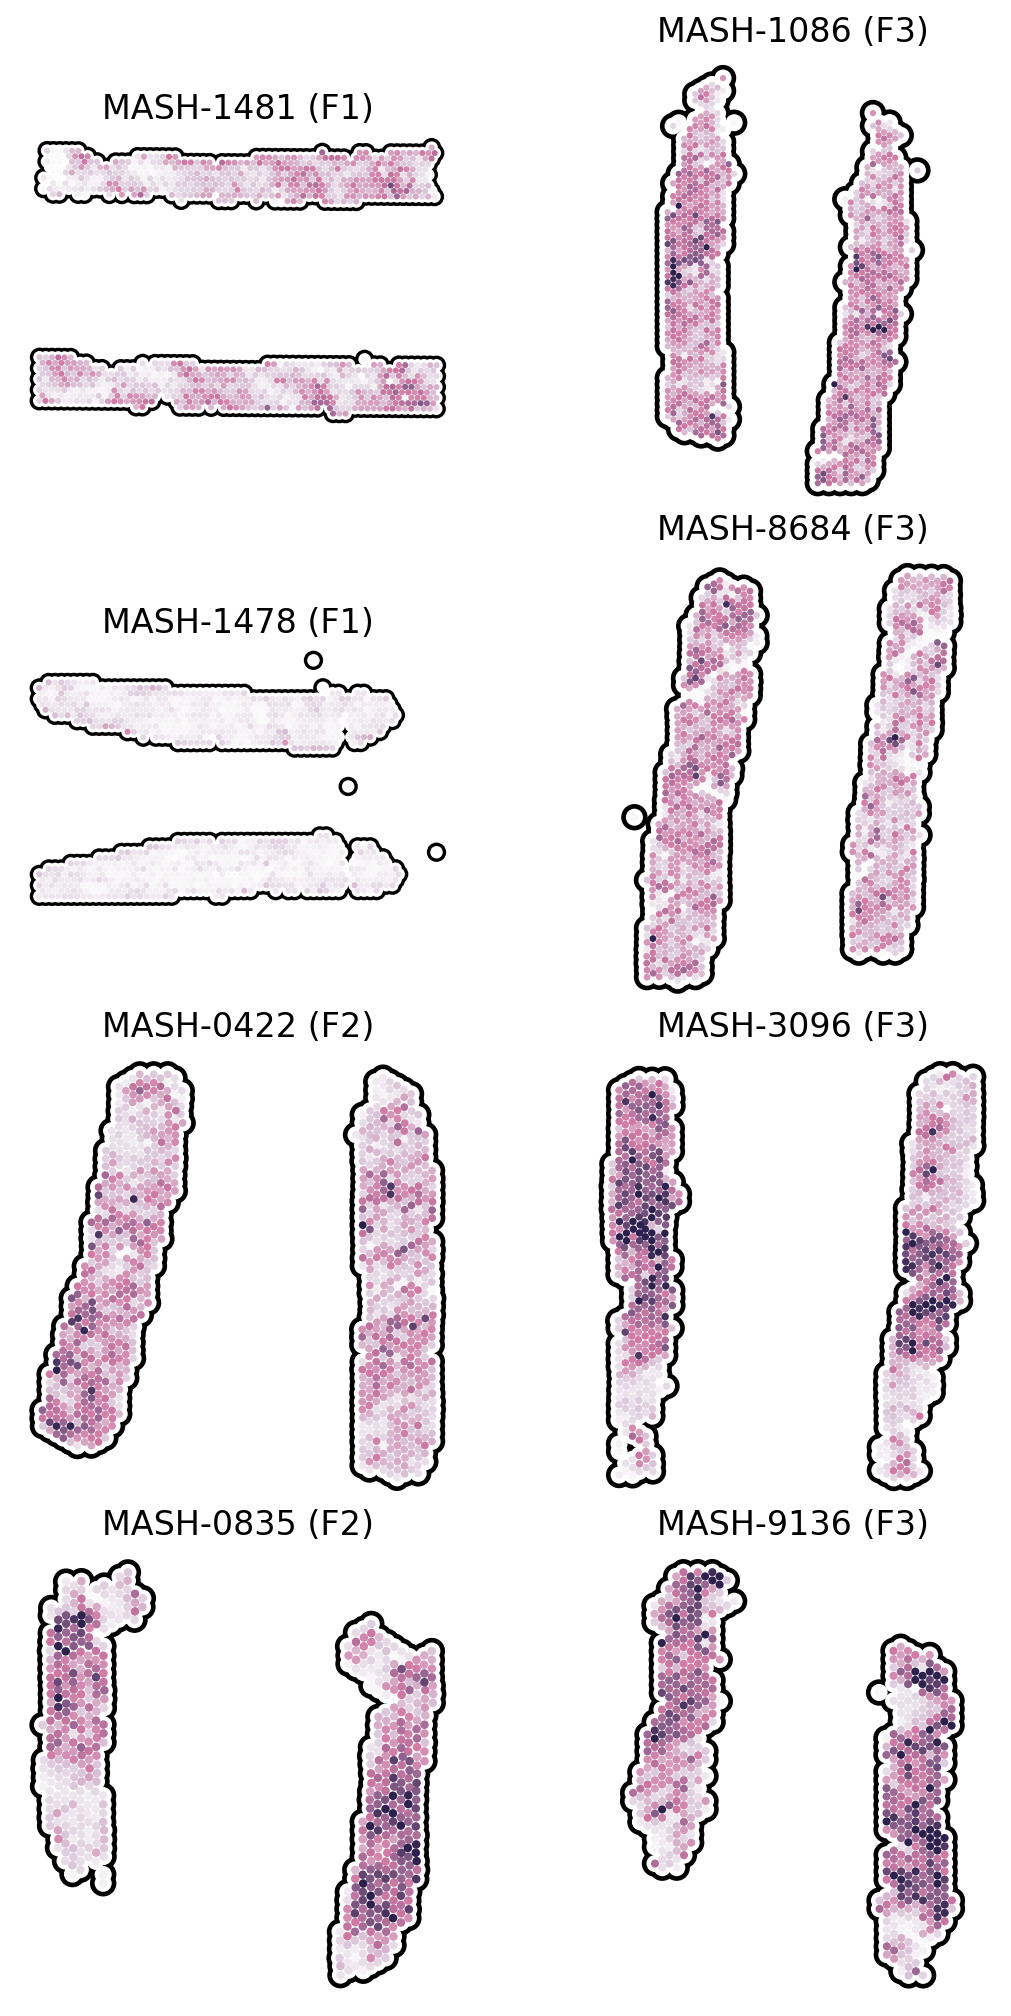

In [ ]:
# MITF visualization for 8 samples
topic_viz = 'PPAR_pathway'
vmax = np.percentile(adata_concat.obs[topic_viz], 99.2)
vmin = np.percentile(adata_concat.obs[topic_viz], 1)
fig, axs = plt.subplots(4, 2, figsize=(8, 16), gridspec_kw={'wspace':0.25, 'hspace':0.1})
#adata_concat.obs['library_id'].unique()
samples = ['MASH-1481', 'MASH-1086',
           'MASH-1478', 'MASH-8684',
           'MASH-0422', 'MASH-3096',
           'MASH-0835', 'MASH-9136']
for library_id in samples: #adata_concat.obs['library_id'].unique()
    ss = samples.index(library_id) #adata_concat.obs['library_id'].unique().tolist().index(library_id)
    _sc_0 = sc.pl.spatial(adata_concat[(adata_concat.obs['library_id'] == library_id)], color=topic_viz, ncols=1, show=False, cmap=cmap, img_key=None, size=1.5, frameon=False, ax=axs[ss//2,ss%2], library_id=library_id, alpha=1, add_outline=True, colorbar_loc=None, vmin=vmin, vmax=vmax)
    _sc_0[0].set_title(f'{library_id} (F{adata_concat[(adata_concat.obs.library_id == library_id)].obs.Fibrosis[0]})', size=15)
plt.tight_layout()
plt.savefig('/data/project/AI4Omic/MASLD/results/ST/STAMP/PPAR_spatial.pdf', dpi=300, bbox_inches='tight')

In [8]:
# STOMics
adata_concat.obs['disease_status']

CTRL-179_AAACAACGAATAGTTC-1     CTRL
CTRL-179_AAACAAGTATCTCCCA-1     CTRL
CTRL-179_AAACAATCTACTAGCA-1     CTRL
CTRL-179_AAACACCAATAACTGC-1     CTRL
CTRL-179_AAACAGAGCGACTCCT-1     CTRL
                                ... 
MASH-8684_TTGTGCAGCCACGTCA-1    MASH
MASH-8684_TTGTGGTGGTACTAAG-1    MASH
MASH-8684_TTGTTGTGTGTCAAGA-1    MASH
MASH-8684_TTGTTTCACATCCAGG-1    MASH
MASH-8684_TTGTTTCATTAGTCTA-1    MASH
Name: disease_status, Length: 48154, dtype: category
Categories (3, object): ['CTRL' < 'MASL' < 'MASH']

In [17]:
adata_c2l = sc.read_h5ad(f"{run_name}/adata_c2l.h5ad")

In [21]:
adata_c2l.obs['disease_status'] = adata_c2l.obs['disease_status'].cat.rename_categories({'MASLD': 'MASL'})
#adata.obs['disease_status'] = adata.obs['disease_status'].cat.reorder_categories(['CTRL', 'MASL', 'MASH'])
adata_c2l.obs['sample'] = adata_c2l.obs['sample'].str.replace('MASLD', 'MASL')
adata_c2l.obs['library_id'] = adata_c2l.obs['library_id'].str.replace('MASLD', 'MASL')
adata_c2l.obs_names = adata_c2l.obs_names.str.replace("MASLD", "MASL")
adata_c2l.uns['spatial'] = {x.replace("MASLD", "MASL"): v for x, v in adata_c2l.uns['spatial'].items()}

In [ ]:
adata_c2l.write('/data/project/AI4Omic/MASLD/data/STOmics/Visium_35samples.h5ad')

... storing 'sample' as categorical
... storing 'library_id' as categorical


In [ ]:
results_folder = '/data/project/AI4Omic/MASLD/results/ST/cell2location'
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map'
c2l = pd.read_csv(f"{run_name}/adata_c2l.obs.csv", index_col=0)
c2l.index = c2l.index.str.replace('MASLD', 'MASL')
c2l

in_tissue  array_row  array_col disease_status  \
CTRL-179_AAACAACGAATAGTTC-1           1          0         16           CTRL   
CTRL-179_AAACAAGTATCTCCCA-1           1         50        102           CTRL   
CTRL-179_AAACAATCTACTAGCA-1           1          3         43           CTRL   
CTRL-179_AAACACCAATAACTGC-1           1         59         19           CTRL   
CTRL-179_AAACAGAGCGACTCCT-1           1         14         94           CTRL   
...                                 ...        ...        ...            ...   
MASH-8684_TTGTGCAGCCACGTCA-1          1         60         74           MASH   
MASH-8684_TTGTGGTGGTACTAAG-1          1         63         95           MASH   
MASH-8684_TTGTTGTGTGTCAAGA-1          1         31         77           MASH   
MASH-8684_TTGTTTCACATCCAGG-1          1         58         42           MASH   
MASH-8684_TTGTTTCATTAGTCTA-1          1         60         30           MASH   

                                 sample  Age Sex  Steatosis  Ballooning  \
CTRL-179_AAACAACGAATAGTTC-1    CTRL-179   28   M          0           0   
CTRL-179_AAACAAGTATCTCCCA-1    CTRL-179   28   M          0           0   
CTRL-179_AAACAATCTACTAGCA-1    CTRL-179   28   M          0           0   
CTRL-179_AAACACCAATAACTGC-1    CTRL-179   28   M          0           0   
CTRL-179_AAACAGAGCGACTCCT-1    CTRL-179   28   M          0           0   
...                                 ...  ...  ..        ...         ...   
MASH-8684_TTGTGCAGCCACGTCA-1  MASH-8684   55   F          3           2   
MASH-8684_TTGTGGTGGTACTAAG-1  MASH-8684   55   F          3           2   
MASH-8684_TTGTTGTGTGTCAAGA-1  MASH-8684   55   F          3           2   
MASH-8684_TTGTTTCACATCCAGG-1  MASH-8684   55   F          3           2   
MASH-8684_TTGTTTCATTAGTCTA-1  MASH-8684   55   F          3           2   

                              Lobular_inflammation  ...  Plasma_IgA  \
CTRL-179_AAACAACGAATAGTTC-1                      0  ...    0.098887   
CTRL-179_AAACAAGTATCTCCCA-1                      0  ...    0.011174   
CTRL-179_AAACAATCTACTAGCA-1                      0  ...    0.017560   
CTRL-179_AAACACCAATAACTGC-1                      0  ...    0.014491   
CTRL-179_AAACAGAGCGACTCCT-1                      0  ...    0.009042   
...                                            ...  ...         ...   
MASH-8684_TTGTGCAGCCACGTCA-1                     2  ...    0.000751   
MASH-8684_TTGTGGTGGTACTAAG-1                     2  ...    0.001451   
MASH-8684_TTGTTGTGTGTCAAGA-1                     2  ...    0.002361   
MASH-8684_TTGTTTCACATCCAGG-1                     2  ...    0.484710   
MASH-8684_TTGTTTCATTAGTCTA-1                     2  ...    0.000188   

                              Plasma_IgG  Portal Vein EC  Resident NK cell  \
CTRL-179_AAACAACGAATAGTTC-1     0.009107        0.030213          0.085696   
CTRL-179_AAACAAGTATCTCCCA-1     0.023482        0.014610          0.010604   
CTRL-179_AAACAATCTACTAGCA-1     0.000127        0.012813          0.011712   
CTRL-179_AAACACCAATAACTGC-1     0.020116        0.016750          0.006074   
CTRL-179_AAACAGAGCGACTCCT-1     0.003600        0.003993          0.026890   
...                                  ...             ...               ...   
MASH-8684_TTGTGCAGCCACGTCA-1    0.004634        0.036465          0.030830   
MASH-8684_TTGTGGTGGTACTAAG-1    0.000196        0.007554          0.268780   
MASH-8684_TTGTTGTGTGTCAAGA-1    0.002465        0.032080          0.061942   
MASH-8684_TTGTTTCACATCCAGG-1    0.181447        0.026857          0.016333   
MASH-8684_TTGTTTCATTAGTCTA-1    0.000904        0.001318          0.081018   

                                  Teff    Tnaive      Treg      cDC1  \
CTRL-179_AAACAACGAATAGTTC-1   0.024713  0.020998  0.017776  0.008647   
CTRL-179_AAACAAGTATCTCCCA-1   0.018410  0.006415  0.007406  0.039687   
CTRL-179_AAACAATCTACTAGCA-1   0.009518  0.059206  0.011110  0.003869   
CTRL-179_AAACACCAATAACTGC-1   0.006117  0.007706  0.007185  0.001847   
CTRL-179_AAACAGAGC